Welcome to my kernel in black friday dataset.

in this kernel i will try to explain some mysterious features in this dataset, and also i will do some EDA and some visualization.

if you have any suggest,advice or correction please don't hesitate to write it, i think it will be very helpful for me.

we will go through these topics:

         1- descriptive data analysis

         2- product categories explaination

         3- Occupation explaination

         4- Visualization
         
         5- Linear Regression With Pytorch

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection
#from sklearn.metrics import accuracy_score
#from sklearn.linear_model import LogisticRegression
#from sklearn.linear_model import LinearRegression
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.svm import SVC
import seaborn as sns
#sns.set(style="whitegrid")


In [ ]:
train = pd.read_csv("../input/black-friday/train.csv")
train = train.drop(["User_ID","Product_ID"] , axis = 1)
train.head()

In [ ]:
train.shape

In [ ]:
train.info()

In [ ]:
train.isnull().sum()

**So the only features that have null values are "Product_Category_2" and "Product_Category_3" ,after filling them we will go through some descriptive statistics**

In [ ]:
train[train.duplicated() ].shape

In [ ]:
train.describe(include="object")

In [ ]:
print(train["Product_Category_1"].unique())
print(train["Product_Category_2"].unique())
print(train["Product_Category_3"].unique())

**we will fill "Product_Category_2" and "Product_Category_3" with zero, i will explain why in Product categories's section** 

In [ ]:
train["Product_Category_2"].fillna(0,inplace=True)
train["Product_Category_3"].fillna(0,inplace=True)

train["Product_Category_2"] = train["Product_Category_2"].astype('int64')
train["Product_Category_3"] = train["Product_Category_3"].astype('int64')

In [ ]:
train.isnull().sum()

## 1- descriptive data analysis

In [ ]:
from sklearn import preprocessing

def preprocessing_train(df,column):

    le = preprocessing.LabelEncoder()

    df[column] = le.fit_transform(df[column])

In [ ]:
preprocced_data = train.copy()

preprocessing_train(preprocced_data,"Gender")
preprocessing_train(preprocced_data,"Age")
preprocessing_train(preprocced_data,"City_Category")
preprocessing_train(preprocced_data,"Stay_In_Current_City_Years")

#### The five-number summary is a set of descriptive statistics that provides information about a dataset. It consists of the five most important sample percentiles:

the sample minimum (smallest observation)

the lower quartile or first quartile

the median (the middle value)

the upper quartile or third quartile

the sample maximum (largest observation)

We can see these five numbers with boxplot or violinplot as follows:

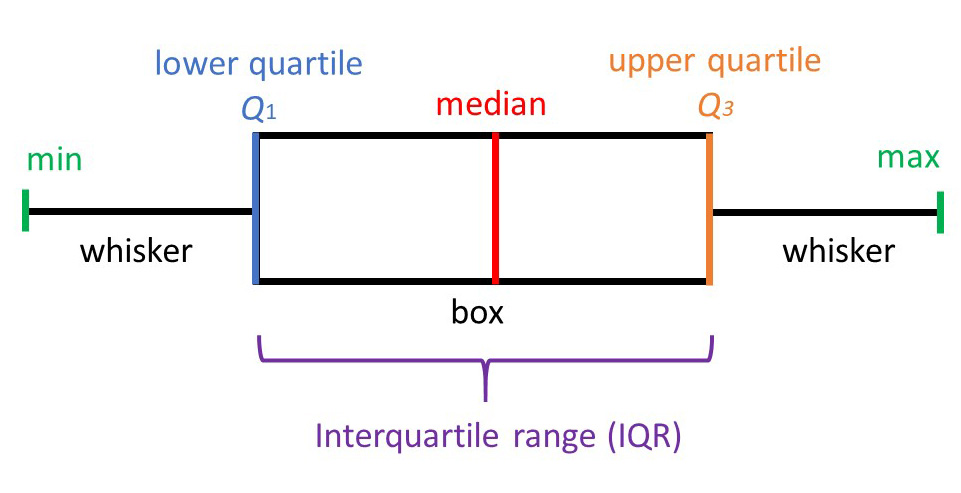

### without Purchase

In [ ]:
plt.figure(figsize=(17, 7))

sns.set(style="whitegrid")

sns.boxplot(data=preprocced_data.drop("Purchase",axis=1))

plt.tick_params(axis='x', rotation=70)

In [ ]:
plt.figure(figsize=(17, 7))

sns.set(style="whitegrid")

sns.boxplot(data=preprocced_data)

plt.tick_params(axis='x', rotation=70)

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=[17,7])

sns.set(style="whitegrid")

sns.boxplot(x = train["Purchase"],ax=ax[0]).set_title("Purchase boxplot", fontsize=18)

sns.violinplot(train["Purchase"],ax=ax[1]).set_title("Purchase violinplot", fontsize=18)

In [ ]:
train.describe(include="all")

**lets see the skewness of data**

**skewness = 0 : normally distributed.**

**skewness > 0 : more weight in the left tail of the distribution.**

**skewness < 0 : more weight in the right tail of the distribution.**

In [ ]:
print(train.skew())
sns.pairplot(train,
             diag_kind="kde",
             corner=True,
             markers="+",
             plot_kws=dict(s=1, edgecolor="b", linewidth=1),
             diag_kws=dict(shade=True))


### Now let's see the correlation between features

In [ ]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,9))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(train.corr(),
            vmin=-1,
            vmax=1,
            cmap='RdBu',
            annot=True)

## 2- product categories explaination

**So, the product categories features are mysterious and for me, the only explanation is that each product could lay under more than one category and this explain why there are some products have value in each one of the 3 categories and others lay under "Product_Category_1" only, and that's why i filled nan values with zeros**

**also exploring products that have the same value in each one of the 3 product categories gives us different purchase value as follows**

In [ ]:
prod_cat = train[train["Product_Category_1"] == 5]
prod_cat = prod_cat[prod_cat["Product_Category_2"] == 8] 
prod_cat[prod_cat["Product_Category_3"] == 14]

In [ ]:
prod_cat["Purchase"].value_counts()

**Now, let's see difference between products categories, i have used countplot for each individual category and scatterplot between them and Purchase feature**

**also calculated the correlation between each category and Purchase**


In [ ]:
def Countplot_with_hue(df , x , y ,hue ,ax ,title):
    
    plt.figure(figsize=(15, 7))

    sns.countplot(x=x, y=y , hue=hue, data=df, ax=ax).set_title(title, fontsize=18)
    
    
    
from scipy import stats

def p_value_and_pearson_coeff(col1 ,col2):
    
    pearson_coef , p_value = stats.pearsonr(train[col1],train[col2])
    
    print("pearson_coef = ",pearson_coef)
    
    print("p_value = ",p_value)
    

In [ ]:
def product_and_purchase(col1 ,col2 ,color , ax1 , ax2 ):
    
    print(col1 + " and Purchase")
    
    p_value_and_pearson_coeff(col1,col2)
    
    print("-"*100)

    train[col1].value_counts().plot(kind='bar',color = color,ax=ax1, title=col1+" count")
    
    train.plot(kind='scatter',x=col1,y=col2,color = color,marker="+" ,ax=ax2, title=col1)

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=[15, 15])

product_and_purchase("Product_Category_1" ,"Purchase", "r" , axes[0,0] ,axes[0,1])

product_and_purchase("Product_Category_2" ,"Purchase", "g" , axes[1,0] ,axes[1,1])

product_and_purchase("Product_Category_3" ,"Purchase", "b", axes[2,0] ,axes[2,1])

## 3- Occupation explaination

**after some searching it seems that this featuer is about the classification of job status like Management Occupations, Business and Financial Operations Occupations, Computer and Mathematical Occupations, etc. according to U.S. bureau of labour statistics https://www.bls.gov/soc/2018/major_groups.htm**

**unfortunaitlly i can't find the equivalnt group name for each number in Occupation feature so i will work with what i have**


In [ ]:
print("Occupation and Purchase")
p_value_and_pearson_coeff("Occupation","Purchase")


In [ ]:
#Countplot_with_hue(df , x , y ,hue ,ax ,title)
Countplot_with_hue(train , "Occupation", None ,None ,None ,"Occupation count")

## 4- Visualization

**now let's go and see some visuals like count of each feature and relation between some of them**

In [ ]:
sorted_data = train.sort_values(by=['City_Category', 'Age',"Stay_In_Current_City_Years"] , ascending=True)

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=[17,7])

Countplot_with_hue(sorted_data , "Age",None ,None,axes[0] ,"age")
Countplot_with_hue(sorted_data , "Stay_In_Current_City_Years",None ,None ,axes[1],"Stay_In_Current_City_Years")


In [ ]:
train.columns

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=[17, 17])

Countplot_with_hue(train , "Age" , None ,"Gender",axes[0,0],"Gender according to Age")
Countplot_with_hue(train , "City_Category" , None ,"Gender",axes[0,1],"Gender according to City_Category")
Countplot_with_hue(sorted_data , "Occupation" , None ,"Gender",axes[1,0],"Gender according to Occupation")
Countplot_with_hue(sorted_data , "Occupation" , None ,"City_Category",axes[1,1],"City Category according to Occupation")



In [ ]:
def pie_chart(column ,explode , labels):
    plt.figure(figsize=(12, 6))


    plt.pie(train[column].value_counts(),
            explode=explode,    #explode=[0.04,0]
            startangle=90, 
            autopct='%1.1f%%',
            labels=labels, #labels=['Males','Females']
            colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99'],
            pctdistance=.6,
            textprops={'fontsize': 20})




    centre_circle = plt.Circle((0,0),0.7,fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)

    plt.axis('equal')  
    plt.tight_layout()
    plt.show()




In [ ]:
train.columns

In [ ]:
pie_chart("Gender" ,[0.04,0] , ['Males','Females'])

In [ ]:
pie_chart("City_Category" ,[0.05,0.05,0.05] , ['A','B',"C"])

In [ ]:
pie_chart("Marital_Status" ,[0.05,0.05] , ["Married","Single"])

## 5- Linear Regression With Pytorch

In [ ]:
train.head()

In [ ]:
le = preprocessing.LabelEncoder()

train["Age"] = le.fit_transform(train["Age"])
train["Stay_In_Current_City_Years"] = le.fit_transform(train["Stay_In_Current_City_Years"])
train["City_Category"] = le.fit_transform(train["City_Category"])


train = pd.get_dummies(train, prefix=["Gender"])


In [ ]:
train.head()

In [ ]:
colormap = plt.cm.RdBu
plt.figure(figsize=(20,10))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(train.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

this is my first time working with pytorch so i searched a lot about it and i found a good simple tutorial to apply a linear regression with Pytorch 

video link: https://www.youtube.com/watch?v=YAJ5XBwlN4o&list=PLqnslRFeH2UrcDBWF5mfPGpqQDSta6VK4&index=7

In [ ]:
# Imports
import torch
import torchvision
import torch.nn as nn # All neural network modules, nn.Linear, nn.Conv2d, BatchNorm, Loss functions
import torch.optim as optim # For all Optimization algorithms, SGD, Adam, etc.
import torch.nn.functional as F # All functions that don't have any para/'meters
from torch.utils.data import DataLoader # Gives easier dataset managment and creates mini batches
import torchvision.datasets as datasets # Has standard datasets we can import in a nice way
import torchvision.transforms as transforms # Transformations we can perform on our dataset

In [ ]:
# 0) Prepare data
features = train.drop("Purchase",axis = 1)
target = train["Purchase"]

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

features_scaled = scaler.fit_transform(features)
target_scaled = scaler.fit_transform(target.values.reshape(-1, 1))

# cast to float Tensor
X = torch.from_numpy(np.asarray(features_scaled).astype(np.float32))
y = torch.from_numpy(np.asarray(target_scaled).astype(np.float32))
y = y.view(y.shape[0], 1)

n_samples, n_features = X.shape

In [ ]:
# 1) Model
# Linear model f = wx + b
input_size = n_features
output_size = 1
learning_rate = 0.001
batch_size = 64
num_epochs = 1
    
class Regressor(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(input_size, 144)
        self.fc2 = nn.Linear(144, 72)
        self.fc3 = nn.Linear(72, output_size)

        #self.dropout = nn.Dropout(p=0.1)

    def forward(self, x):

        #x = self.dropout(F.relu(self.fc1(x)))
        #x = self.dropout(F.relu(self.fc2(x)))
        #x = self.dropout(F.relu(self.fc3(x)))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))

        return x
    
input_size = n_features
output_size = 1
#model = NN(input_size, output_size)
model = Regressor()

# 2) Loss and optimizer
learning_rate = 0.01

criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  

# 3) Training loop
num_epochs = 100
for epoch in range(num_epochs):
    # Forward pass and loss
    y_predicted = model(X)
    loss = criterion(y_predicted, y)

    
    # Backward pass and update
    loss.backward()
    optimizer.step()
    # zero grad before new step
    optimizer.zero_grad()


    if (epoch+1) % 10 == 0:
        print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')
